In [1]:
import matplotlib.pyplot as plt
import random
from two_obs import get_distance, generate_path, RRT_Tree, link_points, init_to_goal

In [2]:
def create_env_map_conf(grid_width, grid_length, to_obs_dis):
    def get_obs(obs):
        obs_num = len(obs)
        # initialize the obstacle lists.
        obstacle =  [[] for i in range(obs_num)]
        ins_obstacle = [[] for i in range(obs_num)]
        for i in range(obs_num):
            obs_length = obs[i][0]
            obs_width = obs[i][1]
            obs_x = obs[i][2]
            obs_y = obs[i][3]
            for h in range(obs_x, obs_x + obs_width):
                obstacle[i].append((h, obs_y))
                obstacle[i].append((h, obs_y + obs_length))
            for j in range(obs_y, obs_y + obs_length):
                obstacle[i].append((obs_x, j))
                obstacle[i].append((obs_x + obs_width, j))
            for k in range(obs_x, obs_x + obs_width):
                for l in range(obs_y, obs_y + obs_length):
                    ins_obstacle[i].append((k, l))

        return obstacle, ins_obstacle


    # create the obstacles.
    obs = []
    obs1_x, obs1_y, obs1_l, obs1_w = 100, 0, 100, 20
    obs2_x, obs2_y, obs2_l, obs2_w = 200, 0, 100, 20
    obs3_x, obs3_y, obs3_l, obs3_w = 300, 0, 100, 20
    obs4_x, obs4_y, obs4_l, obs4_w = 100, 400, 100, 20
    obs5_x, obs5_y, obs5_l, obs5_w = 200, 400, 100, 20
    obs6_x, obs6_y, obs6_l, obs6_w = 300, 400, 100, 20

    obs7_x, obs7_y, obs7_l, obs7_w = 40, 20, 40, 30
    obs8_x, obs8_y, obs8_l, obs8_w = 40, 420, 40, 30
    obs9_x, obs9_y, obs9_l, obs9_w = 140, 20, 40, 30
    obs10_x, obs10_y, obs10_l, obs10_w = 140, 420, 40, 30

    obs.append((obs1_l, obs1_w, obs1_x, obs1_y))
    obs.append((obs2_l, obs2_w, obs2_x, obs2_y))
    obs.append((obs3_l, obs3_w, obs3_x, obs3_y))
    obs.append((obs4_l, obs4_w, obs4_x, obs4_y))
    obs.append((obs5_l, obs5_w, obs5_x, obs5_y))
    obs.append((obs6_l, obs6_w, obs6_x, obs6_y))
    obs.append((obs7_l, obs7_w, obs7_x, obs7_y))
    obs.append((obs8_l, obs8_w, obs8_x, obs8_y))
    obs.append((obs9_l, obs9_w, obs9_x, obs9_y))
    obs.append((obs10_l, obs10_w, obs10_x, obs10_y))


    obstacle, ins_obstacle = get_obs(obs)


    # get points those are not obstacles.
    no_obs_points = []
    for i in range(grid_width):
        for j in range(grid_length):
            for k in range(len(ins_obstacle)):
                if (i, j) not in ins_obstacle[k]:
                     no_obs_points.append((i, j))

    # transfer to the configuration space and get the obstacle points in c space.
    obs_num = len(obs)
    c_space_border_overlap = [[] for i in range(obs_num)]
    for point in no_obs_points:
        for i in range(len(obstacle)):
            for obstacle_point in obstacle[i]:
                if get_distance(point, obstacle_point) == to_obs_dis:
                    c_space_border_overlap[i].append(point)

    c_space_border = []
    for i in range(len(c_space_border_overlap)):
        max_x = max(c_space_border_overlap[i], key=lambda item: item[0])[0]
        min_x = min(c_space_border_overlap[i], key=lambda item: item[0])[0]
        max_y = max(c_space_border_overlap[i], key=lambda item: item[1])[1]
        min_y = min(c_space_border_overlap[i], key=lambda item: item[1])[1]
        for x in range(min_x, max_x):
            for y in range(min_y, max_y):
                c_space_border.append((x, y))

    border = []
    for i in range(grid_length):
        border.append((0, i))
        border.append((grid_width, i))
    for i in range(grid_width):
        border.append((i, 0))
        border.append((i, grid_length))
    #
    # plt.figure(figsize=(15, 10))
    # for border_point in border:
    #     plt.scatter(border_point[0], border_point[1], c='gray', marker='.')
    # for c_space_obs_point in c_space_border:
    #     plt.scatter(c_space_obs_point[0], c_space_obs_point[1], c='gray', marker='.')

    return border, c_space_border


In [21]:
def plot_path(connect, init_point, goal_point, border, obs):
    p_x, p_y = [], []
    for c in connect:
        for p in c:
            p_x.append(p[0])
            p_y.append(p[1])

    graph = {}
    for p1, p2 in connect:
        link_points(graph, p1, p2)

    all_paths = init_to_goal(graph, init_point, goal_point)
    traj_x, traj_y = [], []
    for point in all_paths[0]:
        traj_x.append(point[0])
        traj_y.append(point[1])
    plt.figure(figsize=(15, 10))
    for i in range(0, len(traj_x), 2):
        plt.plot(traj_x[i:i+2], traj_y[i:i+2], 'ro-', linewidth=5)
        plt.plot(traj_x[i+1:i+3], traj_y[i+1:i+3], 'ro-', linewidth=5)
    for b_point in border:
        plt.scatter(b_point[0], b_point[1], c='gray', marker='.')
    for i in range(len(obs)):
        for obs_point in obs[i]:
            plt.scatter(obs_point[0], obs_point[1], c='gray', marker='.')
    for k in range(0, len(p_x), 2):
        plt.plot(p_x[k:k+2], p_y[k:k+2], 'ko-')
    plt.scatter(init_point[0], init_point[1], c='blue', marker='o', s=1000)
    plt.scatter(goal_point[0], goal_point[1], c='red', marker='*', s=1000)
    plt.grid()
    plt.show()


In [4]:
    grid_set = (500, 500)
    init_point = (20, 250)
    goal_point = (250, 450)
    max_iter = 1000
    max_dis_iter = 100


In [5]:
 border, c_space_border = create_env_map_conf(grid_set[0], grid_set[1], 40)

In [6]:
all_points, connect = RRT_Tree(init_point, goal_point, grid_set, c_space_border, max_iter,  max_dis_iter)

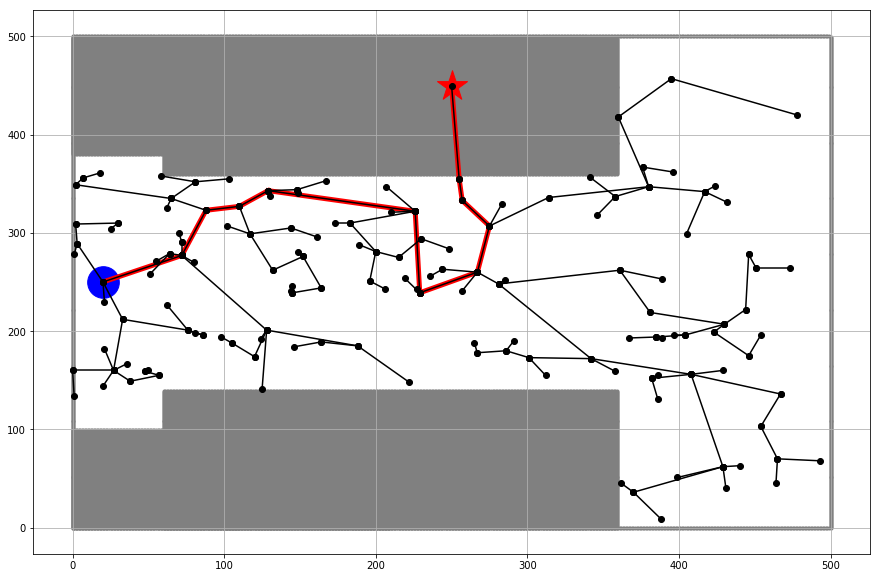

In [7]:
plot_path(connect, init_point, goal_point, border, c_space_border)

In [8]:
    def get_obs(obs):
        obs_num = len(obs)
        # initialize the obstacle lists.
        obstacle =  [[] for i in range(obs_num)]
        ins_obstacle = [[] for i in range(obs_num)]
        for i in range(obs_num):
            obs_length = obs[i][0]
            obs_width = obs[i][1]
            obs_x = obs[i][2]
            obs_y = obs[i][3]
            for h in range(obs_x, obs_x + obs_width):
                obstacle[i].append((h, obs_y))
                obstacle[i].append((h, obs_y + obs_length))
            for j in range(obs_y, obs_y + obs_length):
                obstacle[i].append((obs_x, j))
                obstacle[i].append((obs_x + obs_width, j))
            for k in range(obs_x, obs_x + obs_width):
                for l in range(obs_y, obs_y + obs_length):
                    ins_obstacle[i].append((k, l))

        return obstacle, ins_obstacle

In [12]:
obs = []
obs1_x, obs1_y, obs1_l, obs1_w = 100, 0, 100, 20
obs2_x, obs2_y, obs2_l, obs2_w = 200, 0, 100, 20
obs3_x, obs3_y, obs3_l, obs3_w = 300, 0, 100, 20
obs4_x, obs4_y, obs4_l, obs4_w = 100, 400, 100, 20
obs5_x, obs5_y, obs5_l, obs5_w = 200, 400, 100, 20
obs6_x, obs6_y, obs6_l, obs6_w = 300, 400, 100, 20

obs7_x, obs7_y, obs7_l, obs7_w = 40, 20, 40, 30
obs8_x, obs8_y, obs8_l, obs8_w = 40, 420, 40, 30
obs9_x, obs9_y, obs9_l, obs9_w = 140, 20, 40, 30
obs10_x, obs10_y, obs10_l, obs10_w = 140, 420, 40, 30

obs.append((obs1_l, obs1_w, obs1_x, obs1_y))
obs.append((obs2_l, obs2_w, obs2_x, obs2_y))
obs.append((obs3_l, obs3_w, obs3_x, obs3_y))
obs.append((obs4_l, obs4_w, obs4_x, obs4_y))
obs.append((obs5_l, obs5_w, obs5_x, obs5_y))
obs.append((obs6_l, obs6_w, obs6_x, obs6_y))
obs.append((obs7_l, obs7_w, obs7_x, obs7_y))
obs.append((obs8_l, obs8_w, obs8_x, obs8_y))
obs.append((obs9_l, obs9_w, obs9_x, obs9_y))
obs.append((obs10_l, obs10_w, obs10_x, obs10_y))

In [13]:
obs_border, obs_ins = get_obs(obs)

In [17]:
print(obs_border[0])

[(100, 0), (100, 100), (101, 0), (101, 100), (102, 0), (102, 100), (103, 0), (103, 100), (104, 0), (104, 100), (105, 0), (105, 100), (106, 0), (106, 100), (107, 0), (107, 100), (108, 0), (108, 100), (109, 0), (109, 100), (110, 0), (110, 100), (111, 0), (111, 100), (112, 0), (112, 100), (113, 0), (113, 100), (114, 0), (114, 100), (115, 0), (115, 100), (116, 0), (116, 100), (117, 0), (117, 100), (118, 0), (118, 100), (119, 0), (119, 100), (100, 0), (120, 0), (100, 1), (120, 1), (100, 2), (120, 2), (100, 3), (120, 3), (100, 4), (120, 4), (100, 5), (120, 5), (100, 6), (120, 6), (100, 7), (120, 7), (100, 8), (120, 8), (100, 9), (120, 9), (100, 10), (120, 10), (100, 11), (120, 11), (100, 12), (120, 12), (100, 13), (120, 13), (100, 14), (120, 14), (100, 15), (120, 15), (100, 16), (120, 16), (100, 17), (120, 17), (100, 18), (120, 18), (100, 19), (120, 19), (100, 20), (120, 20), (100, 21), (120, 21), (100, 22), (120, 22), (100, 23), (120, 23), (100, 24), (120, 24), (100, 25), (120, 25), (100, 2

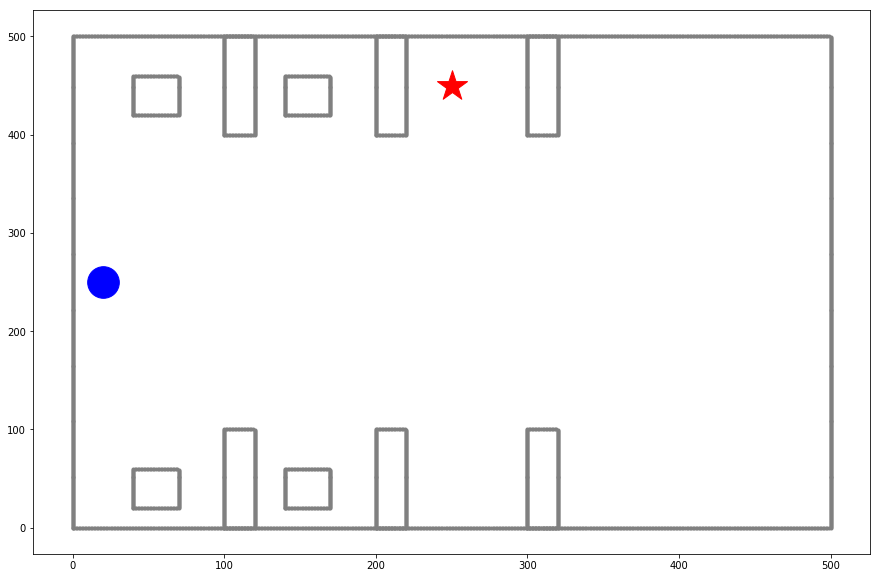

In [18]:
plt.figure(figsize=(15, 10))
for border_point in border:
    plt.scatter(border_point[0], border_point[1], c='gray', marker='.')
for i in range(len(obs_border)):
    for obs_point in obs_border[i]:
        plt.scatter(obs_point[0], obs_point[1], c='gray', marker='.')
plt.scatter(init_point[0], init_point[1], c='blue', marker='o', s=1000)
plt.scatter(goal_point[0], goal_point[1], c='red', marker='*', s=1000)
plt.show()

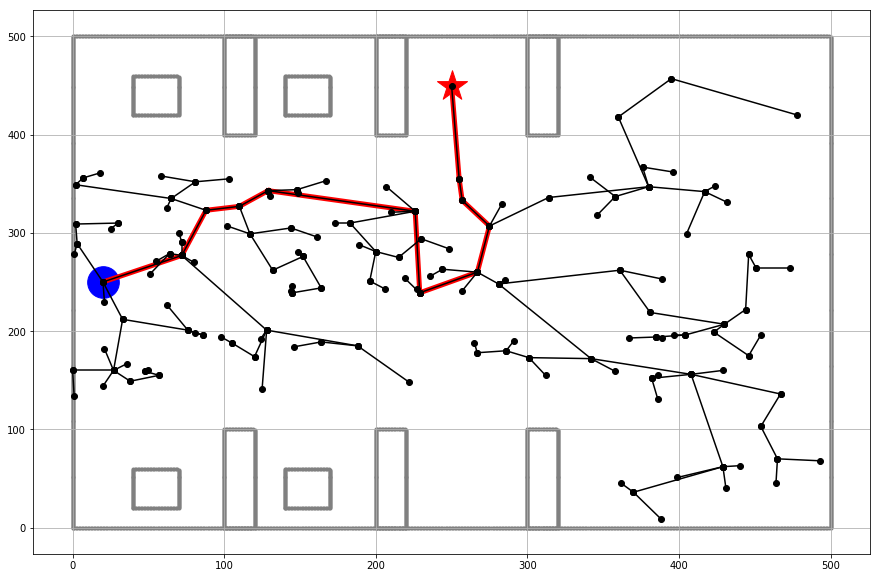

In [22]:
plot_path(connect, init_point, goal_point, border, obs_border)